In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json

In [2]:
#modules for statistics
import math
import statistics
from scipy import stats

# Generate Artists List

In [3]:
# Find a code to get all the artists from this api
#https://www.theaudiodb.com/api_guide.php
# theaudiodb.com/api/v1/json/1/search.php?s=coldplay
artist_names = []

In [4]:
#generate random numbers in the range of available artist IDs
#used to populate artist_names list
random_nums = np.random.randint(low=100000, high=170000, size=800)
#print(ran_ids)

#test with known IDs and intentional erroes
#random_nums = [112024, 0, 100000, 114364]

In [7]:
#create a base url
#example: https://theaudiodb.com/api/v1/json/1/artist.php?i=112024
id_url = "https://theaudiodb.com/api/v1/json/1/artist.php?i="

#create a loop that uses random number
for num in random_nums:
    unique_url = id_url + f'{num}'
    
    #call api url
    request = requests.get(unique_url)
    
    #for each attempt try to convert information to json
    try:
        #convert to json
        info = request.json()
    
    #exception json decode error
    #https://docs.python.org/3/tutorial/controlflow.html
    except json.JSONDecodeError:
        #end this iteration and continue new iteration of for loop
        continue
    
    #if json conversion successful then
    #try to create a variable for single artist to reference later
    try:
        artist = info['artists'][0]['strArtist']
        
    #TypeError exception if url responds with {'artists': None}
    except (TypeError):
        continue
        
    #if the artist is not already in the list then 
    if artist not in artist_names:
        
        #populate artist_names list using info(json)
        #response-> {'artists': [{'idArtist': '114364', 'strArtist': 'Beyoncé', ...
        #dictionary{'artists':['{dictionary}']}
        artist_names.append(info['artists'][0]['strArtist'])
    
    #print(artist_names)

In [8]:
len(artist_names)

604

In [9]:
#print(artist_names)

In [10]:
#alternative to "if not in list then .append"
#convert list to set to remove redundant artists

#unique_artist_ids = set(artist_ids)
#print(unique_artist_ids)

In [11]:
#create loop to pull artist information from the database
#using populated artist_names list
#example url: http://theaudiodb.com/api/v1/json/1/search.php?s=coldplay
#tutorial: https://www.youtube.com/watch?v=pxofwuWTs7c

#create empty dictionary to fill with values
audio_data = {'artist_id':[],
              'artist_name':[],
              'gender':[],
              'members':[],
              'style':[], 
              'genre':[],
             'year_formed':[],
             'year_disbanded':[],
             'location':[]}

#for each artist in the artist list, 
for name in artist_names:
    
    #add the artist name to the base url
    base_url = "http://theaudiodb.com/api/v1/json/1/search.php?s="
    req = requests.get(base_url + f'{name}')
    
    #convert request information into json as a variable
    data = req.json()
    
    #add json values to dictionary
    try:
        audio_data['artist_id'].append(data['artists'][0]['idArtist'])
        audio_data['artist_name'].append(data['artists'][0]['strArtist'])
        audio_data['gender'].append(data['artists'][0]["strGender"])
        audio_data['members'].append(data['artists'][0]["intMembers"])
        audio_data['style'].append(data['artists'][0]["strStyle"])
        audio_data['genre'].append(data['artists'][0]["strGenre"])
        audio_data['year_formed'].append(data['artists'][0]["intFormedYear"])
        audio_data['year_disbanded'].append(data['artists'][0]["strDisbanded"])
        audio_data['location'].append(data['artists'][0]["strCountry"])
    
    #restart loop if TypeError found
    except (TypeError):
        continue

In [13]:
#print(audio_data)

In [12]:
audio_df = pd.DataFrame(audio_data)
audio_df.head(20)

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location
0,134922,Julie Doiron,None,None,None,Indie Rock,1972,None,None
1,128095,Cellador,Male,4,,Power Metal,2004,None,"Denver, USA"
2,142911,Romi Mayes,None,None,None,,0,None,None
3,155537,Martin Briley,None,None,None,,1949,None,None
4,120780,Crown Jewels,Male,2,,Rock,1995,None,"New York, USA"
5,138683,Indecent Exposure,None,None,None,,0,None,None
6,149699,Mr Jukes,None,None,None,,0,None,None
7,159685,Bloodred Hourglass,,1,,Metal,2005,None,
8,120962,Leila Pinheiro,Female,1,,,1960,None,"Belém, Pará"
9,112454,Catatonia,Mixed,4,Rock/Pop,Alternative Rock,1992,Yes,"Cardiff, Wales"


In [13]:
# Cleaning the data: replace the 0s, None, and empty strings with null. Year disbanded: replaced None to no, meaning that they haven't disbanded
#To only replace empty values for one column, specify the column name for the DataFrame:
#df["Calories"].fillna(130, inplace = True)

audio_df['year_disbanded'].replace({2021 : 'No'}, inplace = True)
#audio_df_nan = audio_df.replace(0, np.nan)
audio_df['year_formed'].replace({None: 'Null', '0' : np.nan}, inplace = True) 
audio_df['gender'].replace({None: 'Null', '' : 'Null'}, inplace = True) 
audio_df['location'].replace({None: 'Null', '' : 'Null'}, inplace = True)
audio_df['style'].replace({'' : 'Null', None : 'Null'}, inplace = True)
audio_df['genre'].replace({'' : 'Null'}, inplace = True)


#cols = ['year_formed',"gender","BootSize","SuitSize","Type"]
#df2[cols] = df2[cols].replace({'0':np.nan, 0:np.nan})
audio_df.head(20)

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location
0,134922,Julie Doiron,Null,None,Null,Indie Rock,1972,None,Null
1,128095,Cellador,Male,4,Null,Power Metal,2004,None,"Denver, USA"
2,142911,Romi Mayes,Null,None,Null,Null,NaN,None,Null
3,155537,Martin Briley,Null,None,Null,Null,1949,None,Null
4,120780,Crown Jewels,Male,2,Null,Rock,1995,None,"New York, USA"
5,138683,Indecent Exposure,Null,None,Null,Null,NaN,None,Null
6,149699,Mr Jukes,Null,None,Null,Null,NaN,None,Null
7,159685,Bloodred Hourglass,Null,1,Null,Metal,2005,None,Null
8,120962,Leila Pinheiro,Female,1,Null,Null,1960,None,"Belém, Pará"
9,112454,Catatonia,Mixed,4,Rock/Pop,Alternative Rock,1992,Yes,"Cardiff, Wales"


In [14]:
#replacing and correcting location strings
#replace strings that contain a given value with an entire string
audio_df.loc[audio_df['location'].str.contains
             ('US|American|New York|Sacramento|Colorado|Missouri|California|Florida|Indiana|Texas|Los Angeles|Elk Grove Village|Arizona|Arlington', 
              na=False, case=False, regex=True), 'location'] = 'USA'
audio_df.loc[audio_df['location'].str.contains
             ('UK|England|English|Edinburgh|London|Scotland|Irish|Ireland|Manchester|United Kingdom|Nottingham|Croydon|Liverpool', 
              na=False, case=False, regex=True), 'location'] = 'UK'
audio_df.loc[audio_df['location'].str.contains
             ('German|Deutsch|Deutch', 
              na=False, case=False, regex=True), 'location'] = 'Germany'
audio_df.loc[audio_df['location'].str.contains
             ('Italia|Italy', 
              na=False, case=False, regex=True), 'location'] = 'Italy'
audio_df.loc[audio_df['location'].str.contains
             ('France|French', 
              na=False, case=False, regex=True), 'location'] = 'France'
audio_df.loc[audio_df['location'].str.contains
             ('Belgium', 
              na=False, case=False, regex=True), 'location'] = 'Belgium'
audio_df.loc[audio_df['location'].str.contains
             ('Greece|Greek', 
              na=False, case=False, regex=True), 'location'] = 'Greece'
audio_df.loc[audio_df['location'].str.contains
             ('Switzerland|Swiss', 
              na=False, case=False, regex=True), 'location'] = 'Switzerland'
audio_df.loc[audio_df['location'].str.contains
             ('Canada|Canadian', 
              na=False, case=False, regex=True), 'location'] = 'Canada'
audio_df.loc[audio_df['location'].str.contains
             ('Melbourne|Australia', 
              na=False, case=False, regex=True), 'location'] = 'Japan'
audio_df.loc[audio_df['location'].str.contains
             ('Japan|Japanese', 
              na=False, case=False, regex=True), 'location'] = 'Japan'
audio_df.loc[audio_df['location'].str.contains
             ('Poznań|Poland', 
              na=False, case=False, regex=True), 'location'] = 'Poland'
audio_df.loc[audio_df['location'].str.contains
             ('Россия|Moscow', 
              na=False, case=False, regex=True), 'location'] = 'Russia'
audio_df.loc[audio_df['location'].str.contains
             ('Portugal', 
              na=False, case=False, regex=True), 'location'] = 'Portugal'
audio_df.loc[audio_df['location'].str.contains
             ('Swede|Gothenburg', 
              na=False, case=False, regex=True), 'location'] = 'Sweden'
audio_df.loc[audio_df['location'].str.contains
             ('Odense', 
              na=False, case=False, regex=True), 'location'] = 'Denmark'
audio_df.loc[audio_df['location'].str.contains
             ('Dutch|Netherlands', 
              na=False, case=False, regex=True), 'location'] = 'Netherlands'
audio_df.loc[audio_df['location'].str.contains
             ('Zealand|Wellington', 
              na=False, case=False, regex=True), 'location'] = 'New Zealand'
audio_df.loc[audio_df['location'].str.contains
             ('Rumania', 
              na=False, case=False, regex=True), 'location'] = 'Romania'
audio_df.loc[audio_df['location'].str.contains
             ('South Africa', 
              na=False, case=False, regex=True), 'location'] = 'South Africa'
audio_df.loc[audio_df['location'].str.contains
             ('Argentina', 
              na=False, case=False, regex=True), 'location'] = 'Argentina'
audio_df.loc[audio_df['location'].str.contains
             ('Mexico', 
              na=False, case=False, regex=True), 'location'] = 'Mexico'

In [15]:
#REPLACE AND DROP NAN FOR INDIVIDUAL COLUMNS
#assign individual variables for individual columns with null dropped

#replace 'Null' with NaN for all values in location column, drop NaN
location_na = audio_df.replace({'location': r'Null'}, {'location': np.nan}, regex=True)
location_dropped = location_na.dropna(axis=0, subset=['location'], inplace=False)
location_dropped

#replace 'Null' with NaN for all values in genre column, drop NaN
genre_na = audio_df.replace({'genre': r'Null'}, {'genre': np.nan}, regex=True)
genre_dropped = genre_na.dropna(axis=0, subset=['genre'], inplace=False)
genre_dropped

#replace 'Null' with NaN for all values in genre column, drop NaN
gender_na = audio_df.replace({'gender': r'Null'}, {'gender': np.nan}, regex=True)
gender_dropped = gender_na.dropna(axis=0, subset=['gender'], inplace=False)
gender_dropped

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location
1,128095,Cellador,Male,4,Null,Power Metal,2004,None,USA
4,120780,Crown Jewels,Male,2,Null,Rock,1995,None,USA
8,120962,Leila Pinheiro,Female,1,Null,Null,1960,None,"Belém, Pará"
9,112454,Catatonia,Mixed,4,Rock/Pop,Alternative Rock,1992,Yes,"Cardiff, Wales"
10,118568,Goapele,Female,1,Urban/R&B,Soul,2001,None,USA
...,...,...,...,...,...,...,...,...,...
583,147136,Cerys Matthews,Female,1,Null,Pop,1990,None,"Cardiff, Wales"
585,118868,Crematory,Mixed,5,Metal,Gothic Metal,1991,None,Germany
589,115542,E-Z Rollers,Mixed,3,Electronic,Drum & Bass,1995,None,UK
591,168034,Django Bates,Male,1,Jazz,Pianist,Null,None,UK


In [42]:
# statistics from Pandas dataframe
audio_df.describe()

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location
count,594,594,594,429,594,561,456,46,594
unique,594,594,4,11,20,89,79,1,93
top,134922,Julie Doiron,Male,1,Null,Null,Null,Yes,Null
freq,1,1,245,265,382,219,81,46,303


# Location

In [16]:
#LOCATION COUNT - NULL INCLUDED

#number of times each location appears in the dataframe
location_counts = audio_df['location'].value_counts()

#series
location_counts

Null                     303
USA                       99
UK                        39
Sweden                    12
France                    11
                        ... 
Shreveport, Louisiana      1
Greece                     1
Frankfurt                  1
Iran                       1
Montreal, Québec           1
Name: location, Length: 93, dtype: int64

In [17]:
#LOCATION COUNT - NULL DROPPED

#number of times each location appears in the dataframe
location_counts_dropped = location_dropped['location'].value_counts()

#series
location_counts_dropped

USA                         99
UK                          39
Sweden                      12
France                      11
Germany                     11
                            ..
Torrejon de Ardoz, Spain     1
Shreveport, Louisiana        1
Greece                       1
Frankfurt                    1
Montreal, Québec             1
Name: location, Length: 92, dtype: int64

In [18]:
#LOCATION PROPORTION - NULL INCLUDED

#proportion each location represents in the data
location_proportion = round(location_counts / location_counts.sum(), 2)

#series
location_proportion

Null                     0.51
USA                      0.17
UK                       0.07
Sweden                   0.02
France                   0.02
                         ... 
Shreveport, Louisiana    0.00
Greece                   0.00
Frankfurt                0.00
Iran                     0.00
Montreal, Québec         0.00
Name: location, Length: 93, dtype: float64

In [19]:
#LOCATION PROPORTION - NULL DROPPED

#proportion each location represents in the data
location_proportion_dropped = round(location_counts_dropped / location_counts_dropped.sum(), 2)

#series
location_proportion_dropped


USA                         0.34
UK                          0.13
Sweden                      0.04
France                      0.04
Germany                     0.04
                            ... 
Torrejon de Ardoz, Spain    0.00
Shreveport, Louisiana       0.00
Greece                      0.00
Frankfurt                   0.00
Montreal, Québec            0.00
Name: location, Length: 92, dtype: float64

# Genre

In [20]:
#GENRE COUNT - NULL INCLUDED

#count of unique genres, excluding null values
genre_counts = audio_df['genre'].value_counts()

#series
genre_counts

Null                219
Pop                  27
Alternative Rock     18
Rock                 16
Classical            15
                   ... 
Classic Rock          1
Opera                 1
Psychobilly           1
Guitarist             1
Gothic Metal          1
Name: genre, Length: 89, dtype: int64

In [21]:
#GENRE COUNT - NULL DROPPED

#count of unique genres, excluding null values
genre_counts_dropped = genre_dropped['genre'].value_counts()

#series
genre_counts_dropped

Pop                 27
Alternative Rock    18
Rock                16
Classical           15
Jazz                12
                    ..
Goth                 1
Classic Rock         1
Opera                1
Guitarist            1
Gothic Metal         1
Name: genre, Length: 88, dtype: int64

In [22]:
#GENRE PROPORTION - NULL INCLUDED

#proportion each genre represents in the data
genre_proportion = round(genre_counts / genre_counts.sum(), 4)

#series
genre_proportion

Null                0.3904
Pop                 0.0481
Alternative Rock    0.0321
Rock                0.0285
Classical           0.0267
                     ...  
Classic Rock        0.0018
Opera               0.0018
Psychobilly         0.0018
Guitarist           0.0018
Gothic Metal        0.0018
Name: genre, Length: 89, dtype: float64

In [23]:
#GENRE PROPORTION - NULL DROPPED

#proportion each genre represents in the data
genre_proportion_dropped = round(genre_counts_dropped / genre_counts_dropped.sum(), 4)

#series
genre_proportion_dropped

Pop                 0.0789
Alternative Rock    0.0526
Rock                0.0468
Classical           0.0439
Jazz                0.0351
                     ...  
Goth                0.0029
Classic Rock        0.0029
Opera               0.0029
Guitarist           0.0029
Gothic Metal        0.0029
Name: genre, Length: 88, dtype: float64

In [43]:
genre_dropped['genre'].describe()

count     342
unique     88
top       Pop
freq       27
Name: genre, dtype: object

In [24]:
# Artist and genre analysis
sty_analysis = {"Artist per Music Style": genre_counts_dropped}
music_analysis = pd.DataFrame(sty_analysis)
music_analysis

,Artist per Music Style
Pop,27
Alternative Rock,18
Rock,16
Classical,15
Jazz,12
...,...
Goth,1
Classic Rock,1
Opera,1
Guitarist,1


Pop, Alternative rock, rock, classical, and jazz are the top 5 genres for the artists in this dataset. Pop category is the most popular genre.

In [25]:
# .value_counts() returns an array containing the # of times each unique value occurs in a given column
# Returns the value counts of each unique value in the purchase_category column

#print(audio_df["style"].value_counts())
statistics.mode(genre_dropped['genre'])


'Pop'

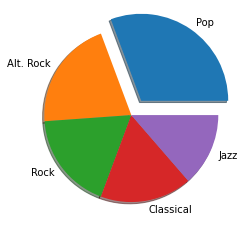

In [51]:
# pie chart to display the most popular genre artist fall into

y = np.array([27, 18, 16, 15, 12])
mylabels = ["Pop", "Alt. Rock", "Rock", "Classical", "Jazz"]
myexplode = [0.2, 0, 0, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show()

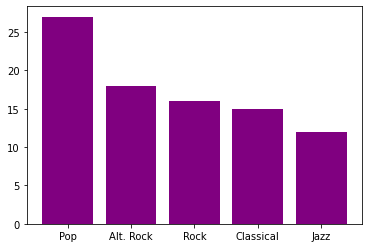

In [53]:
# bar graph to display the same as above
x = ["Pop", "Alt. Rock", "Rock", "Classical", "Jazz"]
y = [27, 18, 16, 15, 12]

plt.bar(x, y, color = "purple")
plt.show()

# Gender

In [26]:
#GENDER COUNT - NULL INCLUDED

#count of unique genres, excluding null values
gender_counts = audio_df['gender'].value_counts()

#series
gender_counts

Male      245
Null      237
Female     74
Mixed      38
Name: gender, dtype: int64

In [27]:
#GENDER COUNT - NULL DROPPED

#count of unique genres, excluding null values
gender_counts_dropped = gender_dropped['gender'].value_counts()

#series
gender_counts_dropped

Male      245
Female     74
Mixed      38
Name: gender, dtype: int64

In [28]:
#GENDER PROPORTION - NULL INCLUDED

#proportion each genre represents in the data
gender_proportion = round(gender_counts / gender_counts.sum(), 2)

#series
gender_proportion

Male      0.41
Null      0.40
Female    0.12
Mixed     0.06
Name: gender, dtype: float64

In [29]:
#GENDER PROPORTION - NULL DROPPED

#proportion each genre represents in the data
gender_proportion_dropped = round(gender_counts_dropped / gender_counts_dropped.sum(), 2)

#series
gender_proportion_dropped

Male      0.69
Female    0.21
Mixed     0.11
Name: gender, dtype: float64

In [30]:
statistics.mode(audio_df['gender'])

'Male'

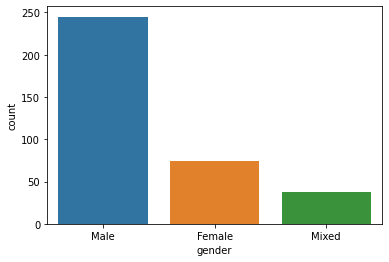

In [35]:
# How many of our artists are male, female, mixed? Create a count plot

sns.countplot(x = gender_dropped['gender'], data = audio_df)
plt.show()

# This plot shows that most of the artists reported in this dataset are male

# Genre by location

In [36]:
#GROUPBYS WITH NULL VALUES DROPPED

#create new vartiables = one df with null values in 'genre' and 'location' dropped
gender_location_na = location_na.replace({'gender': r'Null'}, {'gender': np.nan}, regex=True)
genre_location_dropped = location_dropped.dropna(axis=0, subset=['gender'], inplace=False)
genre_location_dropped

#groupby location
genre_location_grouped = genre_location_dropped.groupby('location')

#count location by genre
genre_by_location = genre_location_grouped['genre'].value_counts()

genre_by_location

location                   genre           
 Bilbao                    Rock                1
Almería, Spain             Psychedelic Rock    1
Basel, Basel-Stadt         Doom Metal          1
Belém, Pará                Null                1
Bergen, Norway             Null                1
                                              ..
Vigo                       Indie               1
Washington, DC             Post-Hardcore       1
Whitby, Ontario            Folk                1
Wyckoff, New Jersey, U.S.  Pop-Rock            1
Youngstown, Ohio           Soul                1
Name: genre, Length: 217, dtype: int64

In [54]:
genre_by_location.describe()

count    217.000000
mean       1.336406
std        0.958496
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        8.000000
Name: genre, dtype: float64

Notes for questions and stats to run:

This data is categorical and nominal (unordered)
Best to use counts and bar graphs for categorical data
Measure of center: Mode - used to categorical data b/c the variables don't have a numerical representation and use the function in stats module: statistics.mode

Questions:

Which genre has the most artists? 
Is there a relationship between genre artists choose and location?